<a href="https://colab.research.google.com/github/gaju45/python-EDA-on-Data-Science-salaries-2023/blob/main/EDA_on_Data_Science_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA On Data Science Salaries in 2023

#**Introduction**

The purpose of this project is to explore a dataset of data science salaries in 2023 and identify any trends or factors that may affect salaries in this field. The dataset was obtained from a survey of data science professionals across various industries and regions.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt

In [6]:
# reading CSV file 
df = pd.read_csv('ds_salaries.csv')

In [7]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [8]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


From above datasets we can observe that all data types for each column is correct so we don't need to be change.

In [10]:
df.shape

(3755, 11)

In [11]:
#count the number of missing value in each column
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There are no such records which have missing value, so we don't need to do anything.

In [12]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


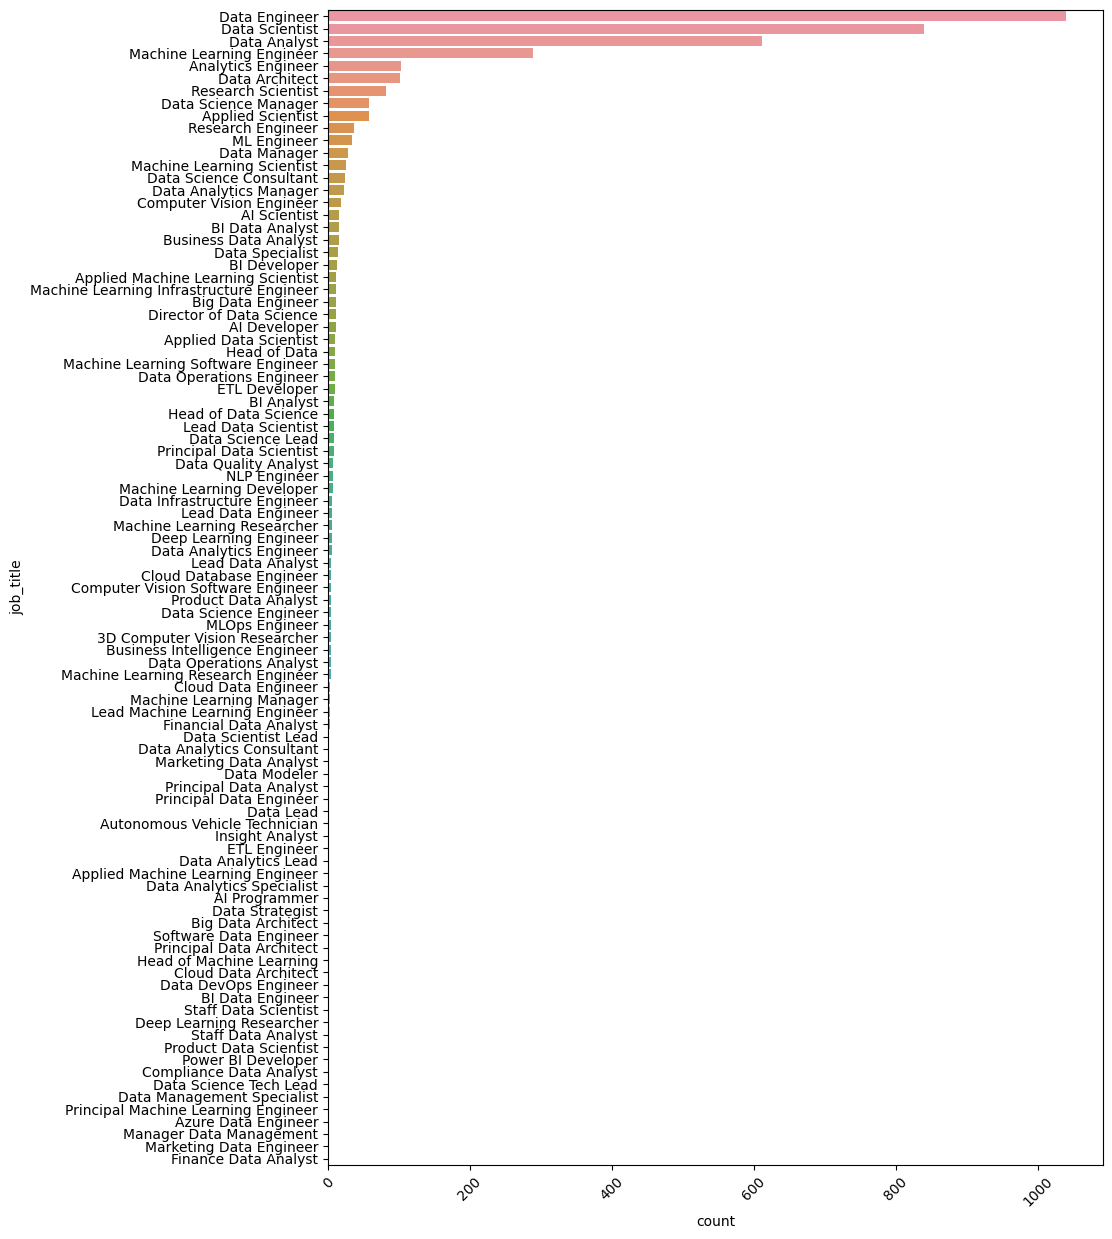

In [13]:
# Generates a count plot of job titles
plt.figure(figsize=(10,15))
sns.countplot(y=df["job_title"] , data = df , order = df["job_title"].value_counts().index)
plt.xticks(rotation = 45)
plt.show()

#**Performing EDA**

##**a. What is the average salary of each job title?**

In [51]:
#grouping data by 'job_title' and calculate the avarage salary
avg_salary_by_job_title = df.groupby('job_title')['salary'].mean()

#convert the value to the whole number
avg_salary_by_job_title = avg_salary_by_job_title.map(int)

#printing the result for top 5 average salaries
print(avg_salary_by_job_title.sort_values(ascending=False)[:5])
top_5_avg_salary_by_job_title = avg_salary_by_job_title[:5]


job_title
Head of Machine Learning          6000000
Principal Data Architect          3000000
Lead Machine Learning Engineer    2548666
Lead Data Scientist                928485
Data Analytics Lead                922500
Name: salary, dtype: int64


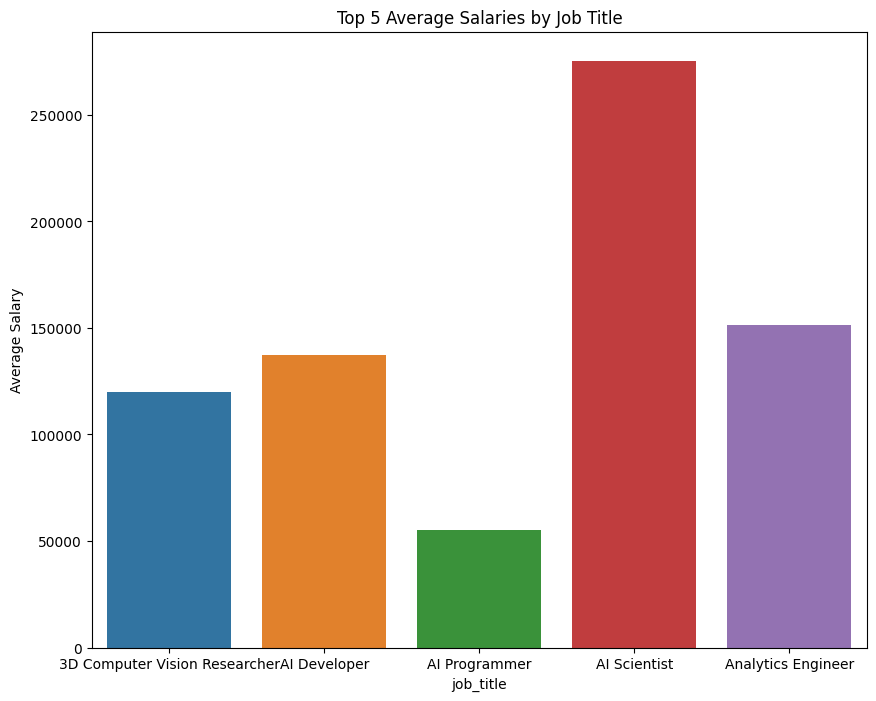

In [52]:
#bar plot of top 5 average salaries by job title
plt.figure(figsize=(10, 8))
sns.barplot(y=top_5_avg_salary_by_job_title.values, x=top_5_avg_salary_by_job_title.index)
plt.xlabel('job_title')
plt.ylabel('Average Salary')
plt.title('Top 5 Average Salaries by Job Title')
plt.show()




##**b. what is the average salary in data science industry based on experience level?**

In [15]:
#grouping data by 'experience_level' and calculate the avarage salary
avg_salary_by_job_title = df.groupby('experience_level')['salary'].mean()

#convert the value to the whole number
avg_salary_by_job_title = avg_salary_by_job_title.map(int)

#printing the result
print(avg_salary_by_job_title.sort_values(ascending=False))


experience_level
MI    248200
EX    246802
EN    188381
SE    170048
Name: salary, dtype: int64


##**c. what is the avarage salary based employee residence?**

In [54]:
#grouping data by 'experience_level' and calculate the avarage salary
avg_salary_by_experience_level = df.groupby('employee_residence')['salary'].mean()

#convert the value to the whole number
avg_salary_by_experience_level = avg_salary_by_experience_level.map(int)

#printing the result
print(avg_salary_by_experience_level.sort_values(ascending=False))


employee_residence
CL    15252500
HU     9533333
JP     2927428
IN     1684774
IL     1500000
        ...   
MD       18000
ID       15000
SK       12000
MA       10000
MK        6000
Name: salary, Length: 78, dtype: int64


##**d. How many employees work for each company size category?**

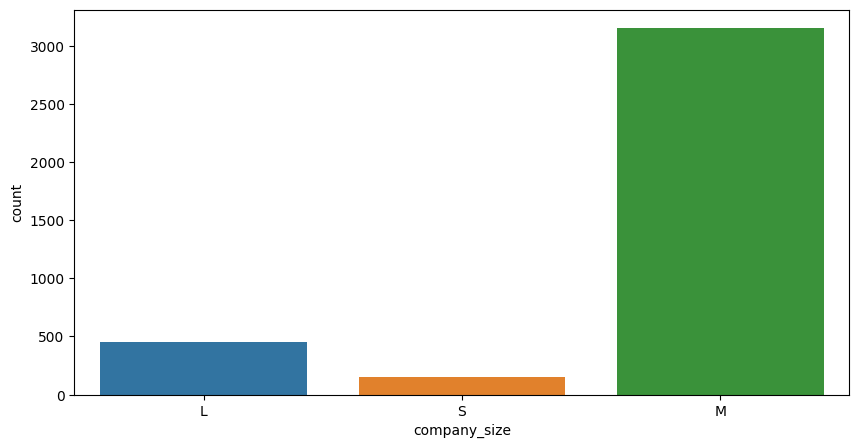

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["company_size"] , data = df)
plt.show()

##**e. Which job titles have the highest and lowest average salaries?**

In [18]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [60]:
# calculate the average salary for each job title
average_salaries = df.groupby('job_title')['salary'].mean()

#converting in whole number
average_salaries = average_salaries.map(int)

# find job title with highest average salary
max_avg_salary_job_title = average_salaries.idxmax()

# find job title with lowest average salary
min_avg_salary_job_title = average_salaries.idxmin()

# print the result
print(f"The job title with the highest average salary is '{max_avg_salary_job_title}' with an average salary of {average_salaries[max_avg_salary_job_title]:}.")
print(f"The job title with the lowest average salary is '{min_avg_salary_job_title}' with an average salary of {average_salaries[min_avg_salary_job_title]:}.")

The job title with the highest average salary is 'Head of Machine Learning' with an average salary of 6000000.
The job title with the lowest average salary is 'Product Data Scientist' with an average salary of 8000.


##**f. What is the distribution of salaries across different experience levels?**

In [20]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [21]:
df['experience_level'].value_counts()

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

In [22]:
salary_dist = df.groupby("experience_level")["salary"].mean()
salary_dist.map(int)

experience_level
EN    188381
EX    246802
MI    248200
SE    170048
Name: salary, dtype: int64

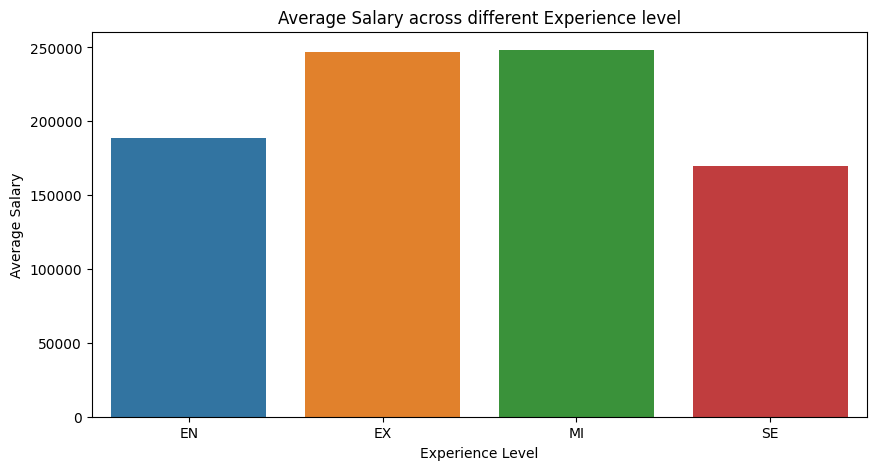

In [36]:
#create a bar chart using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(y=salary_dist.values, x=salary_dist.index)
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')
plt.title('Average Salary across different Experience level')
plt.show()


##**g. What is the average salary for each company location?**

In [24]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [25]:
average_salaray_company = df.groupby("company_location")["salary"].mean()

top_5_avg_salary_company = average_salaray_company.sort_values(ascending=False).head(5)

Text(0.5, 1.0, 'Average Salary across different company Locations')

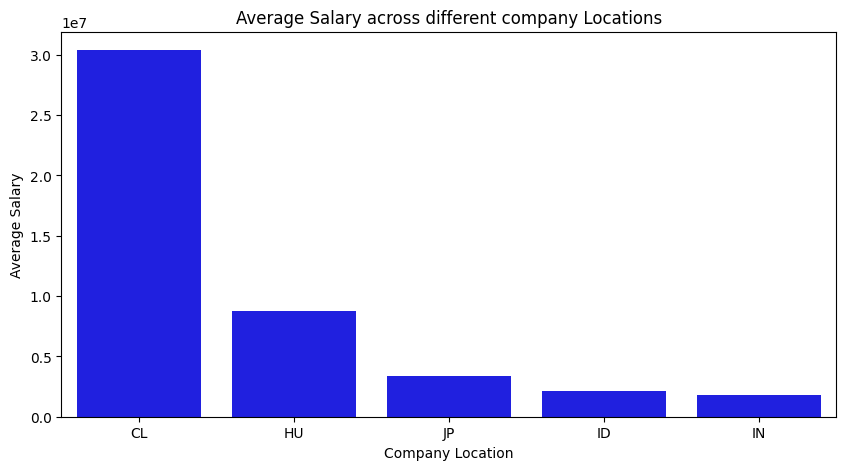

In [26]:
# create bar chart using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(y=top_5_avg_salary_company, x=top_5_avg_salary_company.index, color='blue')
plt.xlabel("Company Location")
plt.ylabel("Average Salary")
plt.title("Average Salary across different company Locations")


##**h. How many employees work remotely for each job title?**

In [27]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [28]:
data = df.loc[df["remote_ratio"] == 100]

In [29]:
data["job_title"].value_counts()

Data Engineer                        432
Data Scientist                       380
Data Analyst                         270
Machine Learning Engineer            109
Data Architect                        69
                                    ... 
BI Data Engineer                       1
Applied Machine Learning Engineer      1
Compliance Data Analyst                1
Data Quality Analyst                   1
Staff Data Scientist                   1
Name: job_title, Length: 75, dtype: int64

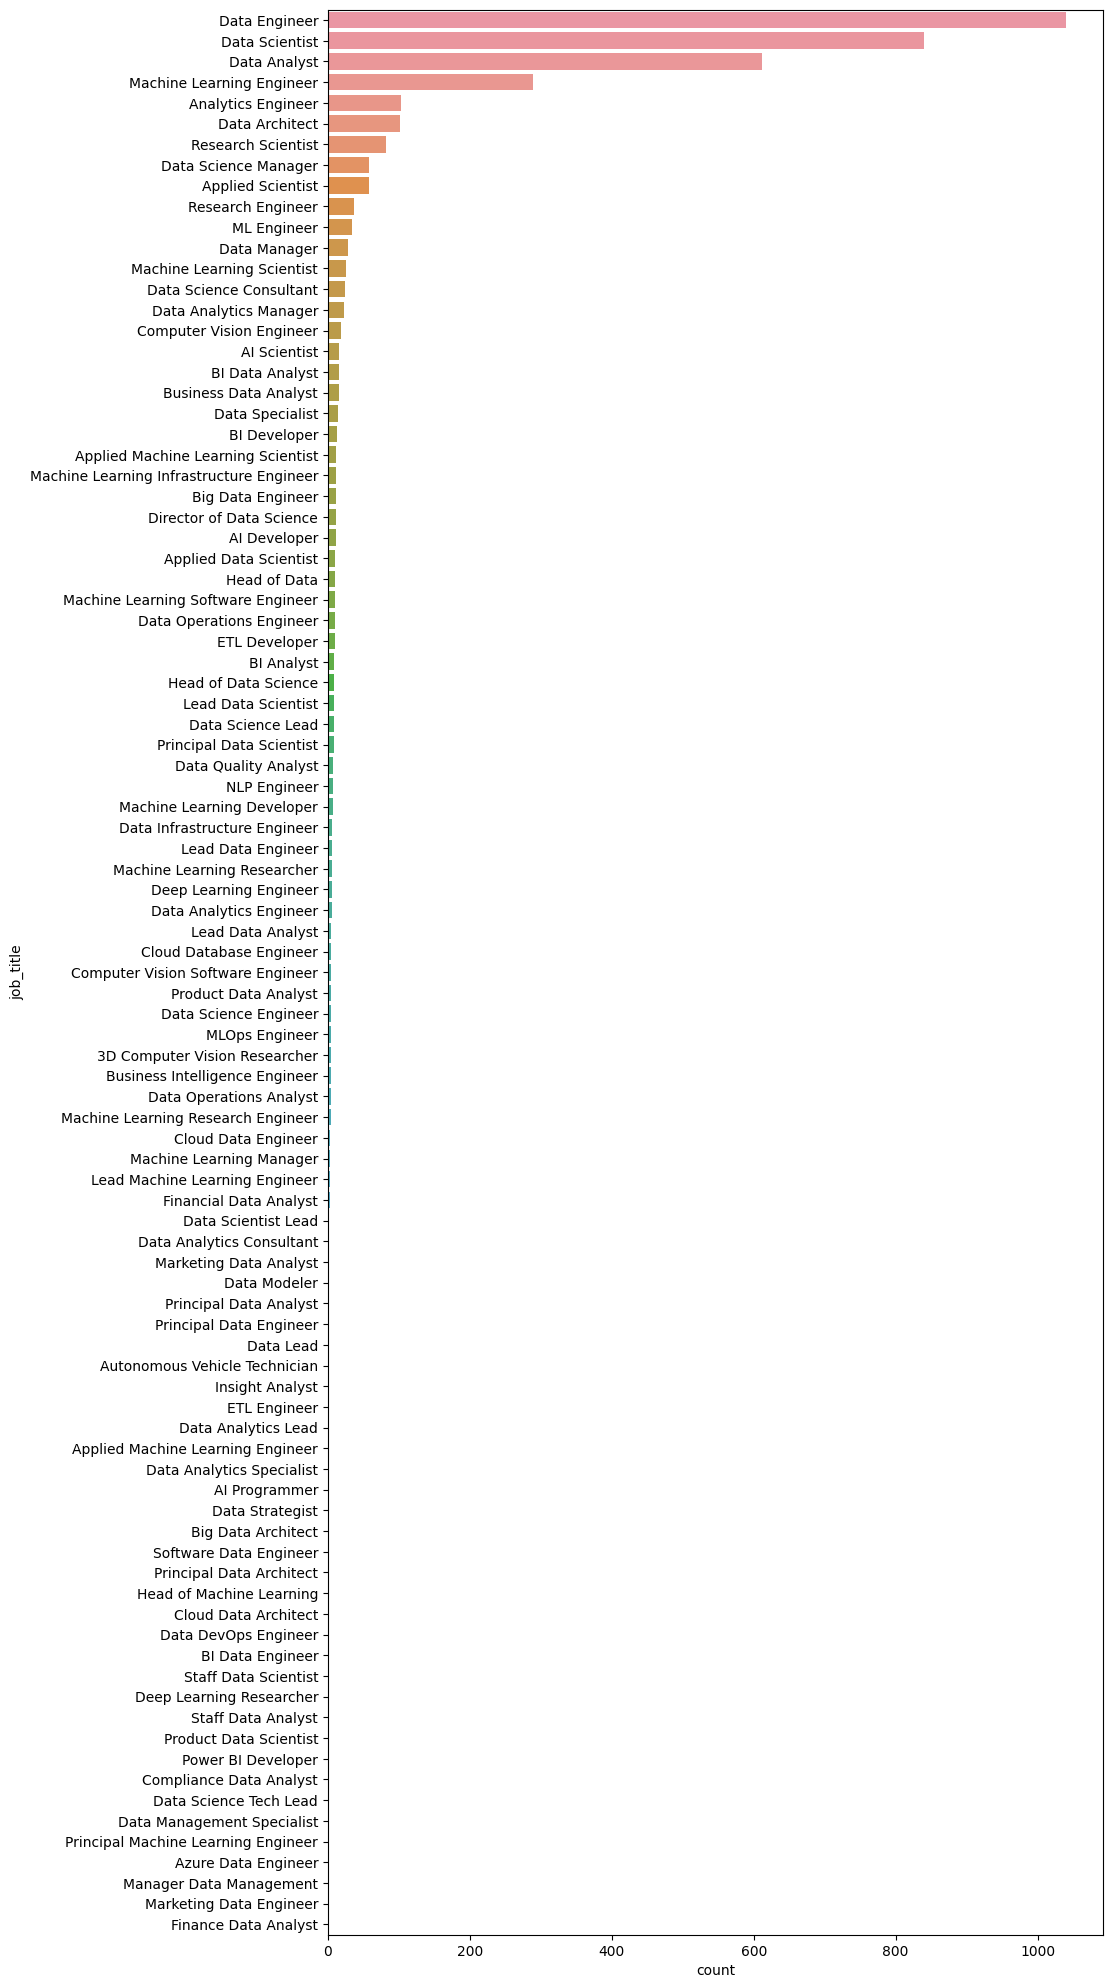

In [30]:
plt.figure(figsize=(10, 25))
sns.countplot(y=df["job_title"], order=df["job_title"].value_counts().index)
plt.show()

##**i. Which experience level has the highest percentage of remote workers?**

In [31]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [32]:
df['experience_level'].value_counts()

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

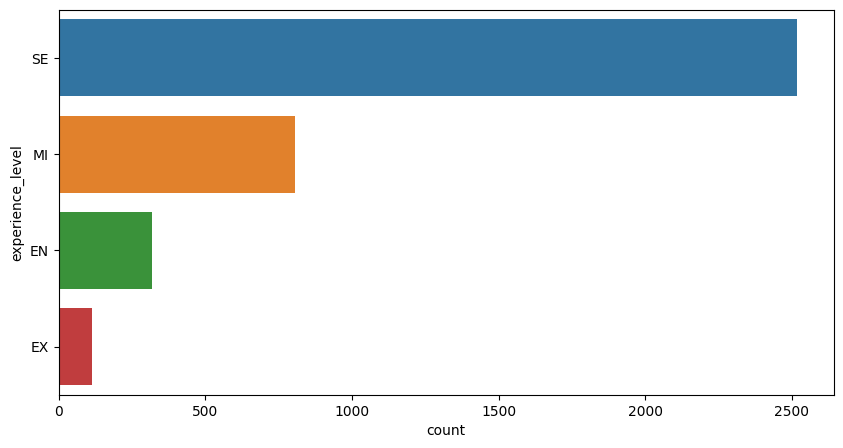

In [33]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df["experience_level"], order=df["experience_level"].value_counts().index)
plt.show()

##**j. which top 5 country has more number of companies in this field?**

In [34]:
df["company_location"].value_counts()

US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

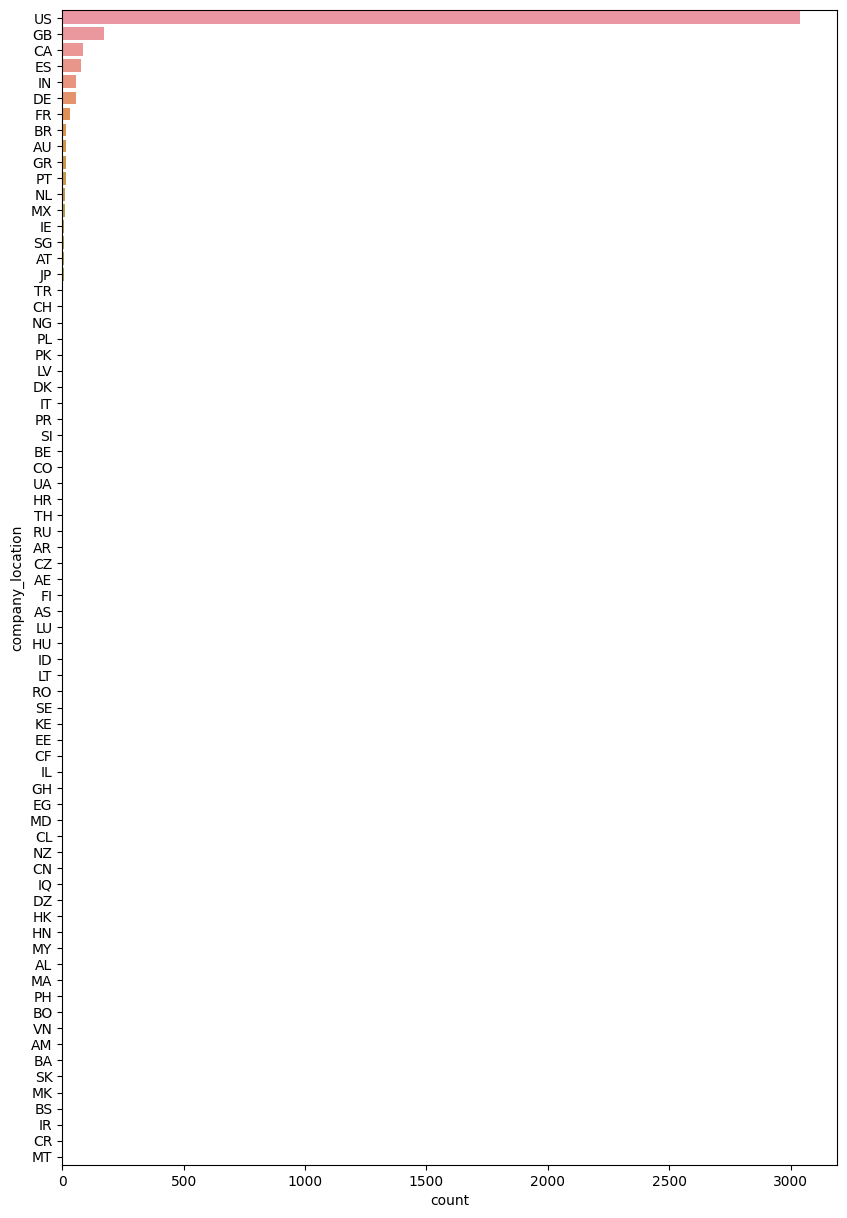

In [35]:
plt.figure(figsize=(10, 15))
sns.countplot(y=df["company_location"], order=df["company_location"].value_counts().index)
plt.show()

#### we can say that the 95% companies are 'US' based.
